# Workflow **AgeAtDeath_Histogram**

## **Load**

In [1]:
import json

In [2]:
with open('musician_age_at_death.json', 'r') as fp:
    data = json.load(fp)

In [3]:
f'The Wikipedia API returned {len(list(data.keys()))} pages (age of death).'

'The Wikipedia API returned 9727 pages (age of death).'

## Filter **Greater Than 15**

In [4]:
data_15plus = {key: value for (key, value) in data.items() if value >= 15 }

In [5]:
f'The Wikipedia API returned {len(list(data_15plus.keys()))} pages (age of death).'

'The Wikipedia API returned 9519 pages (age of death).'

## Transform **Percent of Total**

Notes:
* There are still negative values and zeroes
* Someone made it to 127

In [6]:
from collections import defaultdict 

In [7]:
age_count = defaultdict(int)

for age in data_15plus.values():
    age_count[age] += 1

In [8]:
sorted(age_count.keys())

[15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 127]

In [9]:
age_100 = {}

for key,value in age_count.items():
    age_100[key] = (value / len(data_15plus.keys())) * 100

## Histogram

* Notes there is something wrong - there are evenly spaced spikes in the dataset.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
dataset = age_100

In [12]:
length = len(list(dataset.keys())) # number of keys in dict
n_bins = int(length)

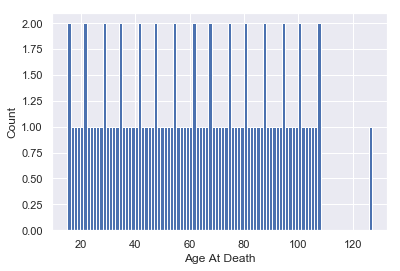

In [14]:
sns.set()
_ = plt.hist(dataset.keys(), bins = n_bins)

_ = plt.xlabel('Age At Death')
_ = plt.ylabel('Count')

plt.show()